# League of legend in Kaggle

* reference [https://www.kaggle.com/code/jeremyarancio/which-decisions-before-10min-lead-to-win/notebook ]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os

In [3]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

-------

## First exploratory of the dataset

In [4]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [6]:
#display all the distributions for the blue side only
blue_side_columns = []
for col in df.columns:
       if "blue" in col:
              blue_side_columns.append(col)

In [7]:
blue_data = df[blue_side_columns]

In [8]:
blue_data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


In [9]:
#describe as a df to visualize all the data
describe_blue = blue_data.describe()

In [10]:
describe_blue

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000


* now we can figure out an outlier for "blueWardsPlaced" : max = 250, which is teoricaly impossible

In [11]:
# #Target
# Target = blue_data['blueWins']
# #Numerical and Categorical data are separated
# Numerical_blue = ['blueWardsPlaced', 'blueWardsDestroyed','blueKills','blueDeaths','blueDeaths','blueAssists','blueEliteMonsters','blueTowersDestroyed','blueTotalGold', 'blueAvgLevel','blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin']
# Categorical_blue = ['blueFirstBlood', 'blueDragons', 'blueHeralds']

## preparation for the regression analysis

### check the correlations

<AxesSubplot:>

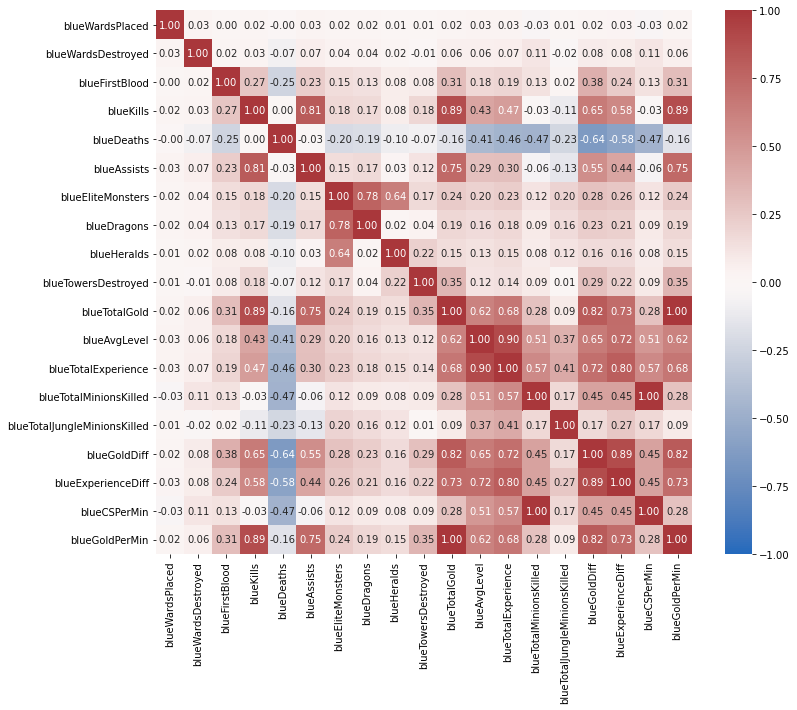

In [12]:
#Correlations
plt.figure(figsize=(12, 10))
sns.heatmap(blue_data.drop("blueWins",axis=1).corr(),cmap='vlag', annot=True, fmt='.2f', vmin=-1)

* We note a lot of correlations between features.  
We'll consider a |correlation coefficient| > 0.5 as representative of a high correlation. 

* In regards of these informations, we modify or drop some features :
* Assits & Kills are added together
* EliteMonsters is dropped : we already have this information with Dragon & Helder
* Everything relative to gold is dropped, because a lot of actions in game allow player to earn gold. We will focus on which decisions has to be taken to result in a potential win. We could study the influence of gold later
* Everything relative to experience will be dropped for the same reason
* CsPerMin is dropped : before 10 min, it is not relevant. We keep TotalCS instead
* We keep AvgLevel because of the relative low correlation with others features except gold we have removed

------

### reorganizing for the logistic regression

In [13]:
#The new Dataframe
blue_data_cleaned = blue_data.copy()

In [14]:
#Assists & Kills
blue_data_cleaned['KA'] = blue_data_cleaned['blueAssists'] + blue_data_cleaned['blueKills']
blue_data_cleaned = blue_data_cleaned.drop(['blueAssists','blueKills'],axis=1)

In [15]:
blue_data_cleaned.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueDeaths,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,KA
0,0,28,2,1,6,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,20
1,0,12,1,0,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,10
2,0,15,0,0,11,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,11
3,0,43,1,0,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,9
4,0,75,4,0,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,12


### Gold columns dropped

In [16]:
#Extraction of Gold columns
Gold = []
for column in list(blue_data_cleaned.columns):
    if 'Gold' in column:
        Gold.append(column)
Gold

['blueTotalGold', 'blueGoldDiff', 'blueGoldPerMin']

In [17]:
blue_data_cleaned = blue_data_cleaned.drop(Gold,axis=1)

In [18]:
blue_data_cleaned.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueDeaths', 'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueAvgLevel', 'blueTotalExperience',
       'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
       'blueExperienceDiff', 'blueCSPerMin', 'KA'],
      dtype='object')

### EliteMosters drop

In [19]:
blue_data_cleaned = blue_data_cleaned.drop(['blueEliteMonsters'],axis=1)

### Experience

In [20]:
exp = []

for column in list(blue_data_cleaned.columns):
    if 'Experience' in column:
        exp.append(column)
exp

['blueTotalExperience', 'blueExperienceDiff']

In [21]:
blue_data_cleaned = blue_data_cleaned.drop(exp, axis = 1)

### CS per minute drop

In [22]:
blue_data_cleaned = blue_data_cleaned.drop(['blueCSPerMin'],axis=1)

## Check the correlation in the cleaned Data

<AxesSubplot:>

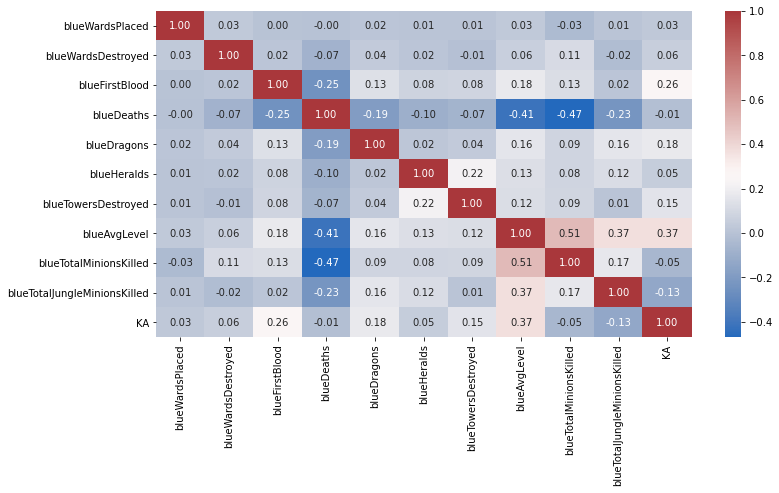

In [23]:
plt.figure(figsize = (12,6))

sns.heatmap(blue_data_cleaned.drop("blueWins", axis = 1).corr(), cmap = 'vlag', annot = True, fmt = '.2f')

<AxesSubplot:>

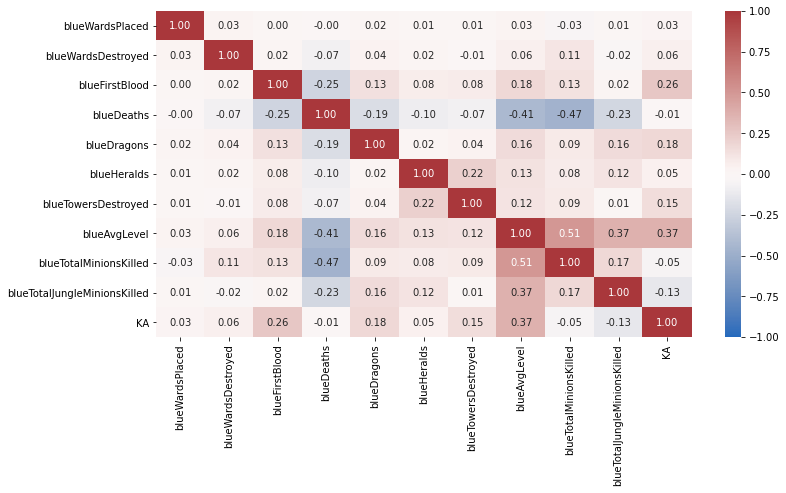

In [24]:
plt.figure(figsize = (12,6))

sns.heatmap(blue_data_cleaned.drop("blueWins", axis = 1).corr(), cmap = 'vlag', annot = True, fmt = '.2f', vmin = -1)

----

## Outliers 

I note some outliers. 
I will remove them if judged not relevant.
* blueWardsPlaced
* blueWardsDestroyed
* blueDeath
* blueTowerDestroyed
* KA

In [25]:
#Copy
blue_no_outliers = blue_data_cleaned.copy()

### WardsPlaced

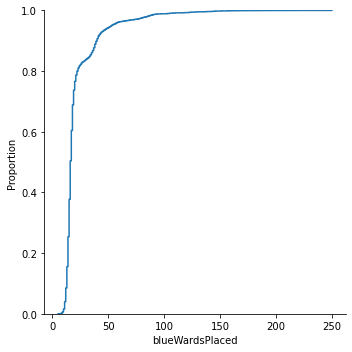

In [26]:
sns.displot(blue_no_outliers['blueWardsPlaced'],kind="ecdf")

* We see that in some games, blue players has placed a lot of wards (more than 100 below 10min, which is not usual in a normal game).  
Sometimes, players decide to not play anymore because they judge the game as already lost. So it is likely they place wards in base or whatever waiting for the game to end.  

For this reason, let's remove everything above 99% 

* https://numpy.org/doc/stable/reference/generated/numpy.quantile.html

In [27]:
#Remove everything above 99%
blue_no_outliers = blue_no_outliers.loc[blue_no_outliers['blueWardsPlaced'] <= np.quantile(blue_no_outliers['blueWardsPlaced'],q=0.99)]

In [28]:
print("We've just removed {} games considering Wards Placed outliers".format(df.shape[0] - blue_no_outliers.shape[0]))

We've just removed 93 games considering Wards Placed outliers


### blueWardsDestroyed

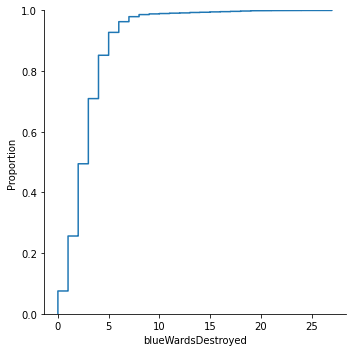

In [29]:
sns.displot(blue_no_outliers['blueWardsDestroyed'],kind="ecdf")

In [30]:
#Remove everything above 99%
blue_no_outliers = blue_no_outliers.loc[blue_no_outliers['blueWardsDestroyed'] <= np.quantile(blue_no_outliers['blueWardsDestroyed'],q=0.99)]

### blue Deaths

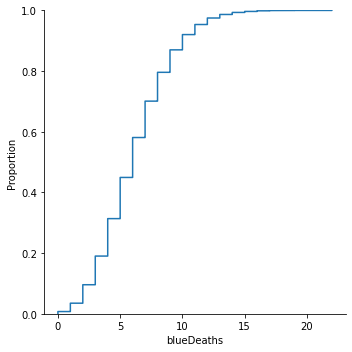

In [31]:
sns.displot(blue_no_outliers['blueDeaths'],kind="ecdf")

* I will remove these outliers too because generally, when a team decides to give up, they're giving kills on purpose, leading to their defeat.  
*I will remove these outliers to consider more fair games only.

In [32]:
#Remove everything above 99%
blue_no_outliers = blue_no_outliers.loc[blue_no_outliers['blueDeaths'] <= np.quantile(blue_no_outliers['blueDeaths'],q=0.99)]

### blue Tower Destroyed

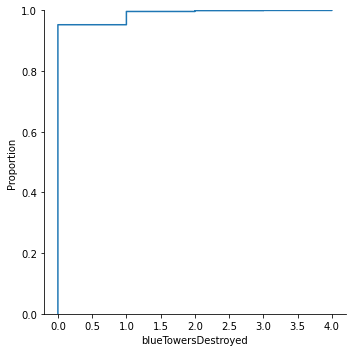

In [33]:
sns.displot(blue_no_outliers['blueTowersDestroyed'],kind="ecdf")

* In regards of the low possibilites which can occur : until 4 towers destroyed, we will keep these outliers.   
Generally, when a team give up, they stay in base and let the enemy team pushs lanes until the Nexus, destroying turrets. 

### Kill & Assists (KA)

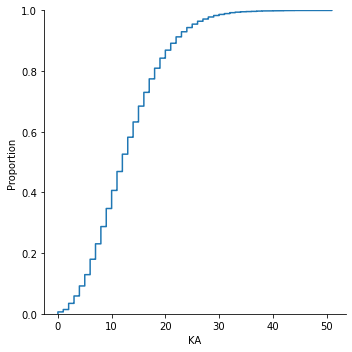

In [34]:
sns.displot(blue_no_outliers['KA'],kind="ecdf")

In [35]:
#Remove everything above 99%
blue_no_outliers = blue_no_outliers.loc[blue_no_outliers['KA'] <= np.quantile(blue_no_outliers['KA'],q=0.99)]

In [36]:
print("We have removed {} rows from the inital dataset".format(df.shape[0] - blue_no_outliers.shape[0]))

We have removed 319 rows from the inital dataset


### Target balnce

In [37]:
#Save
blue_balanced = blue_no_outliers.copy()

In [38]:
print("In this current Dataset, there is {0:.3f}% of won games".format(
    blue_balanced['blueWins'].sum() / blue_balanced['blueWins'].shape[0]
    )
)

In this current Dataset, there is 0.499% of won games


## Logistic Regression

In [39]:
blue_data_scaled = blue_balanced.copy()

In [40]:
#Target
blue_target = blue_balanced['blueWins']

In [41]:
#Features
blue_features = blue_balanced.drop(['blueWins'],axis=1)

### Standardzation

In [44]:
scaler = StandardScaler()
blue_features_scaled = scaler.fit_transform(blue_features)

In [58]:
pd.DataFrame(blue_features_scaled.mean(axis=0))

,0
0,9.216245e-17
1,-1.783789e-17
2,-7.432455e-18
3,1.077706e-16
4,-6.131776e-17
5,6.243263e-17
6,1.412167e-17
7,-9.379759e-16
8,4.151026e-16
9,3.388271e-16


In [59]:
blue_features_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Train Test Split 

In [61]:
x_train, x_test, y_train, y_test = train_test_split(blue_features_scaled,blue_target, random_state=42, test_size=0.10, stratify = blue_target )

### Logistic regression

In [64]:
lg = LogisticRegression(random_state = 42, n_jobs = -1)
lg.fit(blue_features_scaled,blue_target)

LogisticRegression(n_jobs=-1, random_state=42)

In [65]:
lg.score(blue_features_scaled,blue_target)

0.7120292887029289

### Weights

In [67]:
blue_weights = pd.DataFrame()
blue_weights['Features'] = blue_features.columns
blue_weights['Weights'] = lg.coef_.reshape(11,1)

In [68]:
blue_weights.sort_values(by='Weights',ascending=False)

,Features,Weights
10,KA,0.667221
7,blueAvgLevel,0.253446
4,blueDragons,0.227709
8,blueTotalMinionsKilled,0.152652
9,blueTotalJungleMinionsKilled,0.138042
6,blueTowersDestroyed,0.119598
2,blueFirstBlood,0.083464
5,blueHeralds,0.048755
1,blueWardsDestroyed,0.018473
0,blueWardsPlaced,-0.051440
